# IMAM HIDAYAT JCDS-0308 BDG
 

  ### TIME SERIES FOR SALES PREDICTION

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
retail_sales_data = pd.read_csv('retail_sales_dataset.csv')

In [125]:
retail_sales_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [126]:
# Info dataset
print(retail_sales_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [127]:
# Statistik deskriptif
print(retail_sales_data.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [128]:
# Ubah kolom 'Date' menjadi tipe data datetime
retail_sales_data['Date'] = pd.to_datetime(retail_sales_data['Date'])

In [129]:
# Set kolom 'Date' sebagai indeks time series
retail_sales_data.set_index('Date', inplace=True)

## Visualisasi Data

/Users/imamhidayat/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/imamhidayat/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


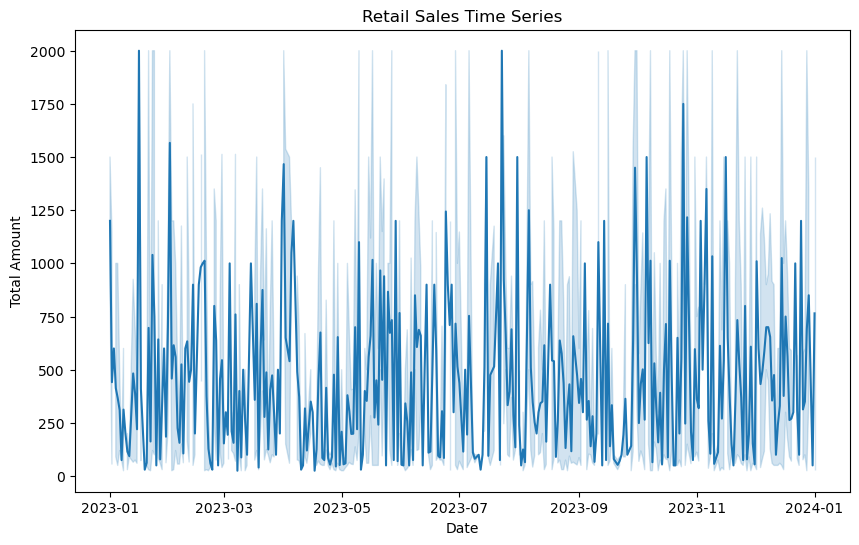

In [130]:
# Visualisasi time series data penjualan ritel
plt.figure(figsize=(10, 6))
sns.lineplot(data=retail_sales_data, x=retail_sales_data.index, y='Total Amount')
plt.title('Retail Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()


- visualisasi time series dari total penjualan ritel berdasarkan tanggal transaksi.

In [131]:
# Resample data ke mingguan dan hitung rolling mean dengan jendela 4 minggu
smoothed_data = retail_sales_data['Total Amount'].resample('W').mean().rolling(window=4).mean()

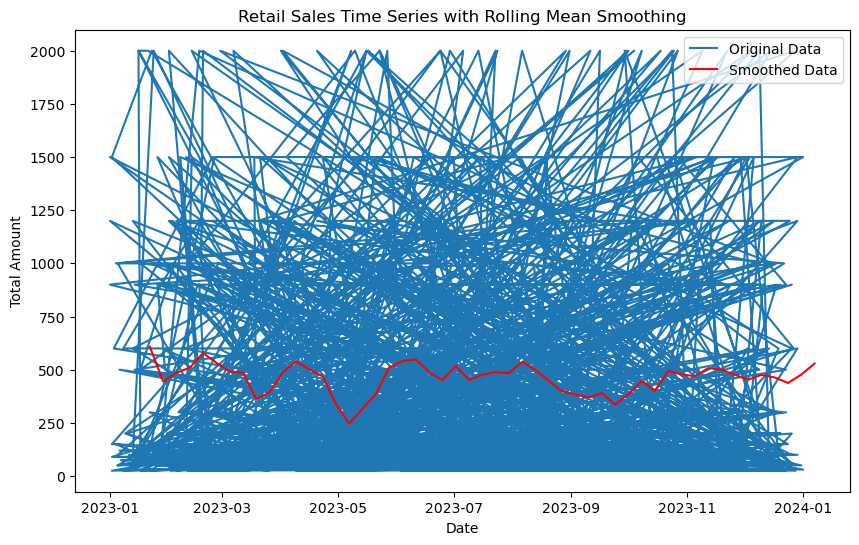

In [132]:
# Plot data asli dan data yang telah di-smooth
plt.figure(figsize=(10, 6))
plt.plot(retail_sales_data.index, retail_sales_data['Total Amount'], label='Original Data')
plt.plot(smoothed_data.index, smoothed_data, label='Smoothed Data', color='red')
plt.title('Retail Sales Time Series with Rolling Mean Smoothing')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


## Pemodelan Time Series

In [133]:
from statsmodels.tsa.arima.model import ARIMA

In [134]:
# Membuat model ARIMA
model = ARIMA(retail_sales_data['Total Amount'], order=(5,1,0))
model_fit = model.fit()


/Users/imamhidayat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/imamhidayat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/imamhidayat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/imamhidayat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self

In [135]:
# Ringkasan model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                 1000
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7820.733
Date:                Tue, 28 May 2024   AIC                          15653.465
Time:                        23:24:14   BIC                          15682.906
Sample:                             0   HQIC                         15664.655
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8314      0.032    -26.007      0.000      -0.894      -0.769
ar.L2         -0.6610      0.040    -16.660      0.000      -0.739      -0.583
ar.L3         -0.4994      0.042    -11.872      0.0

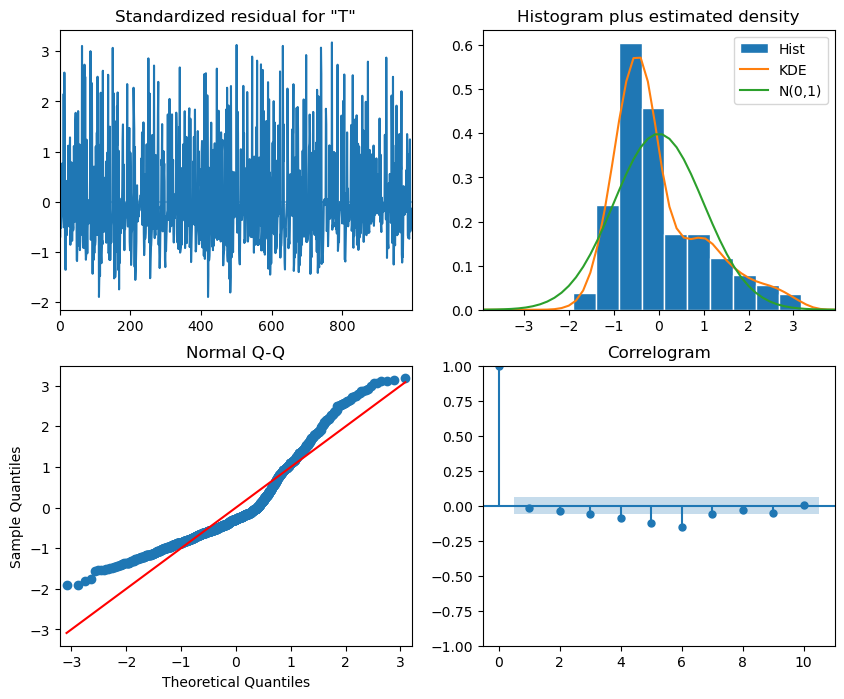

In [136]:
# Plot residual
model_fit.plot_diagnostics(figsize=(10,8))
plt.show()

In [137]:
# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=30)

/Users/imamhidayat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/imamhidayat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


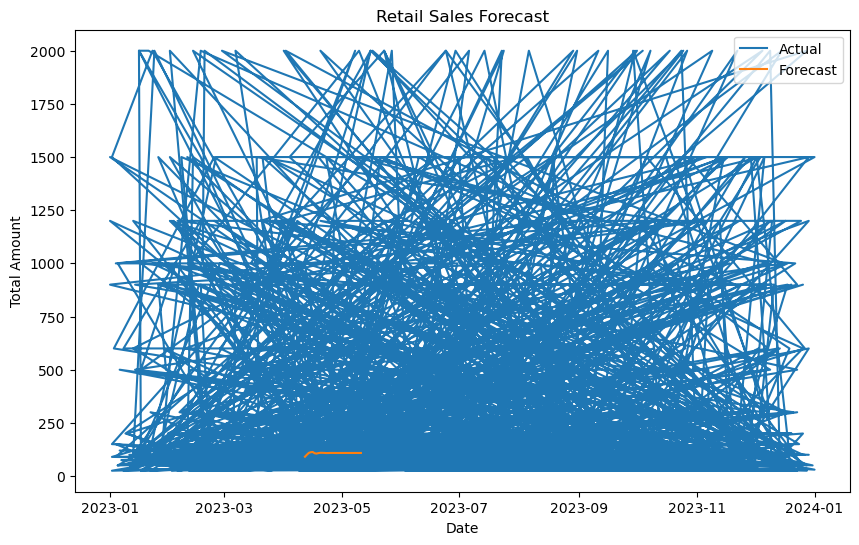

In [138]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(retail_sales_data.index, retail_sales_data['Total Amount'], label='Actual')
plt.plot(pd.date_range(start=retail_sales_data.index[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.title('Retail Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()